In [23]:
import os
import numpy as np
import h5py
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
project_dir = "/Users/biratsapkota/PycharmProjects/PythonProject1"

train_file = os.path.join(project_dir, "sdr_train.hdf5")
test_file = os.path.join(project_dir, "sdr_test.hdf5")

# Load training data
with h5py.File(train_file, 'r') as f_train:
    X_train = f_train['X'][()]  # shape: (num_samples, buf, 2)
    y_train_raw = f_train['y'][()]

# Load test data
with h5py.File(test_file, 'r') as f_test:
    X_test = f_test['X'][()]
    y_test_raw = f_test['y'][()]

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (112464, 1024, 2)
Test data shape: (12497, 1024, 2)


In [25]:
y_train = np.array([int("".join(map(str, label)), 2) for label in y_train_raw])
y_test = np.array([int("".join(map(str, label)), 2) for label in y_test_raw])

print("Converted training labels shape:", y_train.shape)
print("Converted test labels shape:", y_test.shape)


Converted training labels shape: (112464,)
Converted test labels shape: (12497,)


In [26]:
def extract_features(X):
    """
    Input: X of shape (num_samples, buf, 2)
    Output: feature matrix of shape (num_samples, num_features)
    """
    features = []
    for sample in X:
        I = sample[:,0]
        Q = sample[:,1]
        mag = np.sqrt(I**2 + Q**2)
        feat = [
            np.mean(I), np.std(I), np.min(I), np.max(I),
            np.mean(Q), np.std(Q), np.min(Q), np.max(Q),
            np.mean(mag), np.std(mag), np.min(mag), np.max(mag)
        ]
        features.append(feat)
    return np.array(features)

X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

print("Feature shape:", X_train_features.shape)


Feature shape: (112464, 12)


In [27]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_features, y_train)
print("Random Forest training complete.")


Random Forest training complete.


In [28]:
y_pred = rf_model.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8434024165799792

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       818
           1       0.94      0.96      0.95       784
           2       0.78      0.79      0.79       765
           3       0.80      0.76      0.78       789
           4       0.86      0.89      0.88       787
           5       0.82      0.83      0.82       814
           6       0.73      0.86      0.79       782
           7       0.76      0.79      0.77       775
           8       0.98      0.99      0.98       761
           9       0.98      0.96      0.97       802
          10       0.75      0.68      0.72       791
          11       0.83      0.86      0.84       772
          12       0.80      0.81      0.81       757
          13       0.80      0.86      0.83       784
          14       0.83      0.65      0.73       743
          15       0.85      0.80      0.83       773

    accuracy         

<Figure size 1000x800 with 0 Axes>

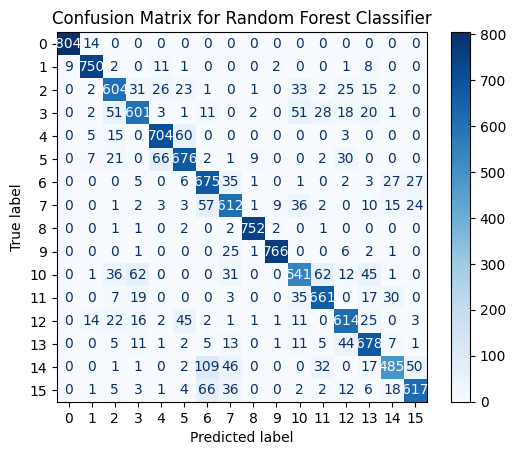

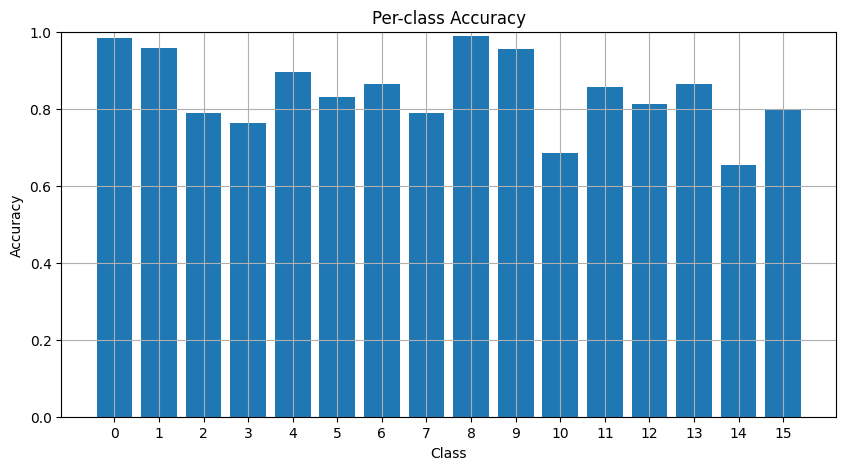

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(16))

plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Optional: bar chart for per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(10,5))
plt.bar(np.arange(16), class_accuracy)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-class Accuracy")
plt.xticks(np.arange(16))
plt.ylim([0,1])
plt.grid(True)
plt.show()
